In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [36]:
# To load the dataset
data = pd.read_csv('Reviews.csv')  

# Check the first few rows of the data
print(data.head())

# Separate the text and the labels
X = data['review'].values
y = data['class'].values

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)  # To Keep the top 10,000 words
tokenizer.fit_on_texts(X)

# Convert the text to sequences of integers
X_sequences = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform length (e.g., max length 100)
max_len = 100
X_pad = pad_sequences(X_sequences, maxlen=max_len)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# Check the shape of the data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

                                              review  class
0  Fantastic spot for an even or a quite cocktail...      1
1  Love, love, love the calamari. It's so good an...      1
2  Love this place. Stiff martinis and cocktails,...      1
3  It's everything a great cocktail bar should be...      1
4  I came here before a pirates game, so it was a...      1
Training data shape: (3456, 100)
Test data shape: (865, 100)


In [37]:
# Initialize the RNN model
model = Sequential()

# Embedding Layer: Convert the words to dense vector representations
model.add(Embedding(input_dim=10000, output_dim=128))

# LSTM Layer: Capture sequential dependencies in the data
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))

# Fully connected (Dense) layer for binary classification (0 = negative, 1 = positive)
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
# To Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.6654 - loss: 0.6176 - val_accuracy: 0.8647 - val_loss: 0.3115
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.9058 - loss: 0.2357 - val_accuracy: 0.9306 - val_loss: 0.1807
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.9662 - loss: 0.1134 - val_accuracy: 0.9364 - val_loss: 0.2311
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 113ms/step - accuracy: 0.9830 - loss: 0.0682 - val_accuracy: 0.9225 - val_loss: 0.2303
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.9915 - loss: 0.0373 - val_accuracy: 0.9376 - val_loss: 0.2690


In [39]:
# To Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9335 - loss: 0.2871
Test Accuracy: 93.76%


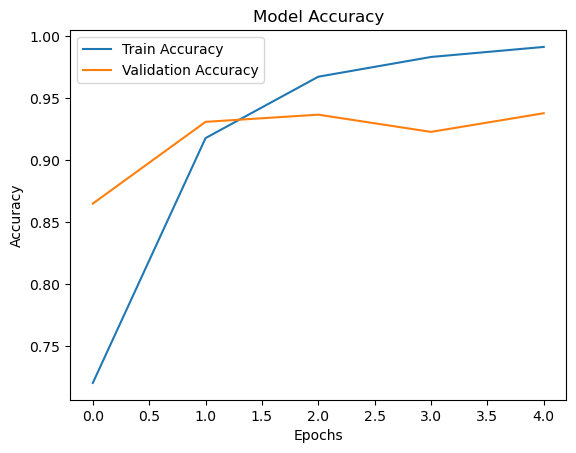

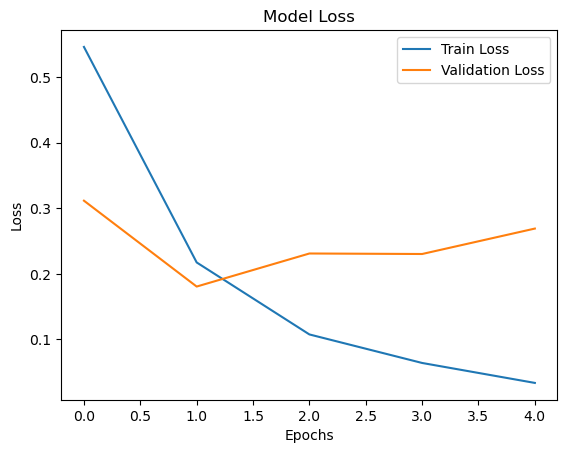

In [40]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [42]:

new_review = ["Fantastic spot for an even or a quite cocktail","Very, very good"]
# Tokenize and pad the review text
sample_sequence = tokenizer.texts_to_sequences([new_review])
sample_padded = pad_sequences(sample_sequence, maxlen=max_len)

# Predict the sentiment of the review
prediction = model.predict(sample_padded)

# Display the prediction (0 = negative, 1 = positive)
print(f"Sentiment Prediction: {'Positive' if prediction >0.5 else 'Negative'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Sentiment Prediction: Positive
